In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
path = "/home/user/Desktop/fer/semestar7/podaci/labosi/projekt1/zop_project/anonymisedData/"

assessments = pd.read_csv(path + "assessments.csv")
courses = pd.read_csv(path + "courses.csv")
studentAssessment = pd.read_csv(path + "studentAssessment.csv")
studentInfo = pd.read_csv(path + "studentInfo.csv")
studentRegistration = pd.read_csv(path + "studentRegistration.csv")
studentVle = pd.read_csv(path + "studentVle.csv")
vle = pd.read_csv(path + "vle.csv")

In [5]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [6]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [7]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [8]:
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [9]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [10]:
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [11]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


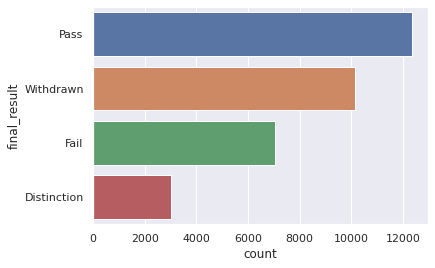

In [12]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(y="final_result", data=studentInfo)

In [13]:
assesments_pom = assessments.groupby("code_module", as_index = False).agg({
    "date" : "min"
})
print(assesments_pom)
print(assesments_pom.head(0))

  code_module  date
0         AAA  19.0
1         BBB  12.0
2         CCC  18.0
3         DDD  20.0
4         EEE  33.0
5         FFF  19.0
6         GGG  61.0
Empty DataFrame
Columns: [code_module, date]
Index: []


In [14]:
studentRegistration_pom = studentRegistration.groupby("code_module", as_index = False).size()
print(studentRegistration_pom)
print(studentRegistration_pom.head(0))

  code_module  size
0         AAA   748
1         BBB  7909
2         CCC  4434
3         DDD  6272
4         EEE  2934
5         FFF  7762
6         GGG  2534
Empty DataFrame
Columns: [code_module, size]
Index: []


In [15]:
assesments_pom_studentRegistration_pom_table = pd.merge(assesments_pom, studentRegistration_pom, on = "code_module")

i = 0

for course in assesments_pom_studentRegistration_pom_table.values:
    assesments_pom_studentRegistration_pom_table.loc[i] = [course[0], "Day " + str(int(course[1])), course[2]]
    i += 1
    print(course)

['AAA' 19.0 748]
['BBB' 12.0 7909]
['CCC' 18.0 4434]
['DDD' 20.0 6272]
['EEE' 33.0 2934]
['FFF' 19.0 7762]
['GGG' 61.0 2534]


In [16]:
courses_pom = courses["code_module"].unique()
course_year_row = []
for course in courses_pom:
    pom_list_a = assessments.loc[assessments["code_module"] == course]["code_presentation"].unique()
    pom_list_b = []
    for el in pom_list_a:
        pom_list_b.append(el[:-1])
    pom_list_b = set(pom_list_b)
    print(pom_list_b)

    course_year_row.append(" & ".join(pom_list_b))
print(course_year_row)

{'2014', '2013'}
{'2014', '2013'}
{'2014'}
{'2014', '2013'}
{'2014', '2013'}
{'2014', '2013'}
{'2014', '2013'}
['2014 & 2013', '2014 & 2013', '2014', '2014 & 2013', '2014 & 2013', '2014 & 2013', '2014 & 2013']


In [17]:
assesments_pom_studentRegistration_pom_table["Year(run)"] = course_year_row

In [18]:
assesments_pom_studentRegistration_pom_table.rename(columns = {
    "code_module" : "Course",
    "date" : "1st assignment submission day",
    "size" : "# of registered students"
})

,Course,1st assignment submission day,# of registered students,Year(run)
0,AAA,Day 19,748,2014 & 2013
1,BBB,Day 12,7909,2014 & 2013
2,CCC,Day 18,4434,2014
3,DDD,Day 20,6272,2014 & 2013
4,EEE,Day 33,2934,2014 & 2013
5,FFF,Day 19,7762,2014 & 2013
6,GGG,Day 61,2534,2014 & 2013


In [19]:
students_pom_1 = studentInfo[["id_student", "gender", "highest_education", "age_band", "num_of_prev_attempts", "disability", "final_result"]]

students_pom_2 = studentRegistration[["id_student", "date_registration"]]

students_pom_3 = studentVle[["id_student", "sum_click"]]

students_pom_4 = studentAssessment[["id_assessment", "score", "id_student"]]

students_pom_5 = assessments[["id_assessment", "date"]]

In [20]:
students_pom_12 = pd.merge(students_pom_1, students_pom_2, on = "id_student")

students_pom_123 = pd.merge(students_pom_12, students_pom_3, on="id_student")

In [21]:
students_pom_45 = pd.merge(students_pom_4, students_pom_5, on="id_assessment")
students_pom_45 = students_pom_45.groupby(['id_student', 'score'], as_index = False)['date'].min().drop_duplicates().reset_index(drop=True)

In [ ]:
students_pom = pd.merge(students_pom_123, students_pom_45, on = "id_student")
print(students_pom)

In [ ]:
students_pom.replace({"highest_education" : "A Level or Equivalent"}, {"highest_education" : 1})
students_pom.replace({"highest_education" : "HE Qualification"}, {"highest_education" : 1})
students_pom.replace({"highest_education" : "Post Graduate Qualification"}, {"highest_education" : 1})
students_pom.replace({"highest_education" : "No Formal quals"}, {"highest_education" : 0})
students_pom.replace({"highest_education" : "Lower Than A Level"}, {"highest_education" : 0})

In [ ]:
students_pom.replace({"age_band" : "0-35"}, {"age_band" : 0})
students_pom.replace({"age_band" : "35-55"}, {"age_band" : 1})
students_pom.replace({"age_band" : "55<="}, {"age_band" : 1})

In [ ]:
students_pom.replace({"disability" : "Y"}, {"disability" : 1})
students_pom.replace({"disability" : "N"}, {"disability" : 0})

In [ ]:
students_pom.replace({"gender" : "M"}, {"gender" : 0})
students_pom.replace({"gender" : "F"}, {"gender" : 1})

In [ ]:
assesments_pom_studentRegistration_pom_table.rename(columns = {
    "gender" : "Gender",
    "highest_education" : "Educational Level",
    "age_band" : "Age",
    "num_of_prev_attempts" : "Previous Attempts",
    "disability" : "Disability",
    "score" : "First Assignment Mark",
    "date" : "Registration Date",
    "sum_click" : "Clicks till Course Starts"
})

In [ ]:
columns = ["Gender", "Educational Level", "Age", "Previous Attempts", "Disability", "First Assignment Mark", "Registration Date", "Clicks till Course Starts"]

In [ ]:
students_heat_map = sns.heatmap(students_pom[columns], annot = True, cbar = False)
plt.ylabel(columns)
plt.xlabel(columns)
plt.show()

In [ ]:
final_result = []

students_pom.replace({"final_result" : "Withdraw"}, {"final_result" : 0})
students_pom.replace({"final_result" : "Pass"}, {"final_result" : 1})
students_pom.replace({"final_result" : "Fail"}, {"final_result" : 2})
students_pom.replace({"final_result" : "Distinction"}, {"final_result" : 3})

x = students_pom[columns].copy()
y = students_pom["final_result"].copy()

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

wthdraw_train_x = [train_x[i] for i, y in enumerate(train_y) if y == 0]
pass_train_x = [train_x[i] for i, y in enumerate(train_y) if y == 1]
fail_train_x = [train_x[i] for i, y in enumerate(train_y) if y == 2]
distinction_train_x = [train_x[i] for i, y in enumerate(train_y) if y == 3]

wthdraw_train_y = [train_y[i] for i, y in enumerate(train_y) if y == 0]
pass_train_y = [train_y[i] for i, y in enumerate(train_y) if y == 1]
fail_train_y = [train_y[i] for i, y in enumerate(train_y) if y == 2]
distinction_train_y = [train_y[i] for i, y in enumerate(train_y) if y == 3]

wthdraw_test_x =  [test_x[i] for i, y in enumerate(test_y) if y == 0]
pass_test_x = [test_x[i] for i, y in enumerate(test_y) if y == 1]
fail_test_x = [test_x[i] for i, y in enumerate(test_y) if y == 2]
distinction_test_x = [test_x[i] for i, y in enumerate(test_y) if y == 3]

wthdraw_test_y =  [test_y[i] for i, y in enumerate(test_y) if y == 0]
pass_test_y = [test_y[i] for i, y in enumerate(test_y) if y == 1]
fail_test_y = [test_y[i] for i, y in enumerate(test_y) if y == 2]
distinction_test_y = [test_y[i] for i, y in enumerate(test_y) if y == 3]

In [ ]:
train_x_ = [wthdraw_train_x, pass_train_x, fail_train_x, distinction_train_x]

train_y_ = [wthdraw_train_y, pass_train_y, fail_train_y, distinction_train_y]

test_x_ = [wthdraw_test_x, pass_test_x, fail_test_x, distinction_test_x]

test_y_ = [wthdraw_test_y, pass_test_y, fail_test_y, distinction_test_y]

In [ ]:
conf1 = [[0, 0], [0, 0]]
conf2 = [[0, 0], [0, 0]]
br = 0
for (x1, x2), (y1, y2) in zip((train_x_, test_x_), (train_y_, test_y_)):
    dtc = DecisionTreeClassifier().fit(x1, y1)
    rfc = RandomForestClassifier().fit(x1, y1)

    y_predicted_dtc = dtc.predict(x2)
    y_predicted_rfc = rfc.predict(x2)

    if br == 1:
        conf1[0, 0] += np.sum(y_predicted_dtc == y2)
        conf1[0, 1] += np.sum(y_predicted_dtc != y2)

        conf2[0, 0] += np.sum(y_predicted_rfc == y2)
        conf2[0, 1] += np.sum(y_predicted_rfc != y2)
    else:
        pom_sum1 = np.sum(y_predicted_dtc != 1)
        conf1[1, 1] += np.sum(y_predicted_dtc != 1)
        conf1[1, 0] += len(y2) - pom_sum1

        pom_sum2 = np.sum(y_predicted_rfc != 1)
        conf2[1, 1] += np.sum(y_predicted_rfc != 1)
        conf2[1, 0] += len(y2) - pom_sum2

    print(precision_score(y2, y_predicted_dtc))
    print(precision_score(y2, y_predicted_rfc))

    print(recall_score(y2, y_predicted_dtc))
    print(recall_score(y2, y_predicted_rfc))

    print(f1_score(y2, y_predicted_dtc))
    print(f1_score(y2, y_predicted_rfc))

    print(accuracy_score(y2, y_predicted_dtc))
    print(accuracy_score(y2, y_predicted_rfc))


In [ ]:
print(conf1)

In [ ]:
print(conf2)